# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Answer

The target variable will be the car's price. The predictor's variables will include make, model, year, mileage, vehicle condition and location. The goal of the assignment is to build a predictive model that properly quantifies the impact the aforementioned features on the car's price. This insight can provide actionable recommendations to the used car dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Answer

First step I would take is open the file in Excel to get familiar with the data prior to doing any notebook work with Pandas or Numpy. This preparation generally leads to either dropping columns that don't make sense or knowing the types of data just spot checking. In this case VIN will always be unique, so it can be dropped. In addition the size column is rarely populated so that can be dropped.

After doing the spot checking/getting comfortable with the data in Excel, my first step in the notebook is to load dataset into a pandas dataframe and then get an overview of the data through a call to the head and tail function as found during my spot checking - the first several rows are misleading from a missing value perspective. Using the describe, info and isnull methods to further evaluate what is in the dataset and determine what level of data preparation will be required. Lastly, I would use the unique method to determine the unique values of each column to determine their cardinality.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Pandas Data Investigation
The following code shows the investigation performed.

In [51]:
# Import Pandas and read in the csv into a dataframe
import pandas as pd

df = pd.read_csv('data/vehicles.csv')

In [14]:
# Look at the columns from the dataframe
print('Head')
print(df.head())
# Shows a lot of NaN values

print('Tail')
print(df.tail())

# However, tail does not - indicating a brash decision on just the head is not logical

Head
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar

In [16]:
# Inspect the variation 

print(df.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [18]:
# Identify Missing Values and get the data types of the columns

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Analysis
In looking at the null counts - the following columns are going to be my focus:
region, year, manufacturer, model, fuel, odometer, title_status, transmission and state

Other columns such as condition and type would be interesting to look at as well, but given larger % of nulls I would be hessistant.

In [12]:
# Establish the unique values for each column

for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].nunique()} unique values')

region: 404 unique values
manufacturer: 42 unique values
model: 29649 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 118246 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values


In [53]:
# Drop Na given the LinearRegression can't handle NaN's
df = df.dropna() 

In [55]:
# Re-inspect the dataframe after some clean up
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].nunique()} unique values')

region: 392 unique values
manufacturer: 41 unique values
model: 5139 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 21938 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values


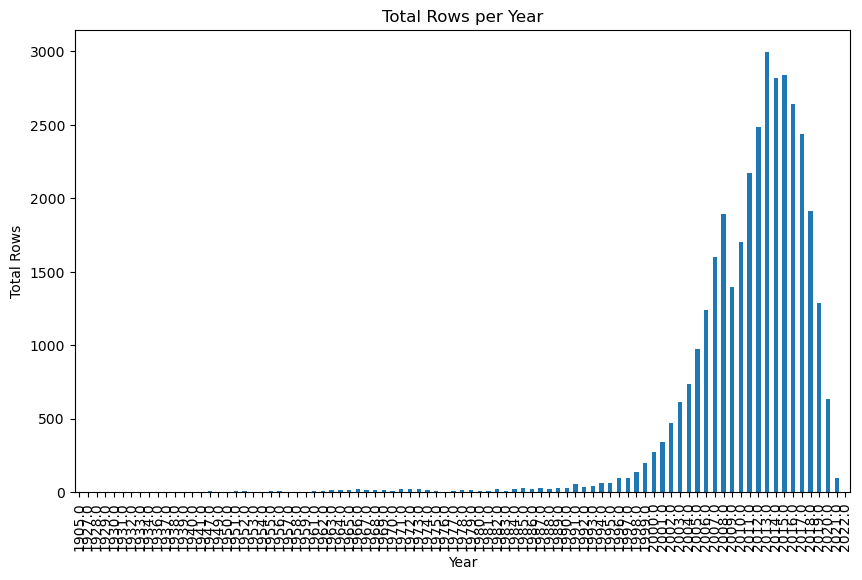

In [57]:
# Look at the breakdown of unique years
import matplotlib.pyplot as plt

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Rows')
plt.title('Total Rows per Year')
plt.show()

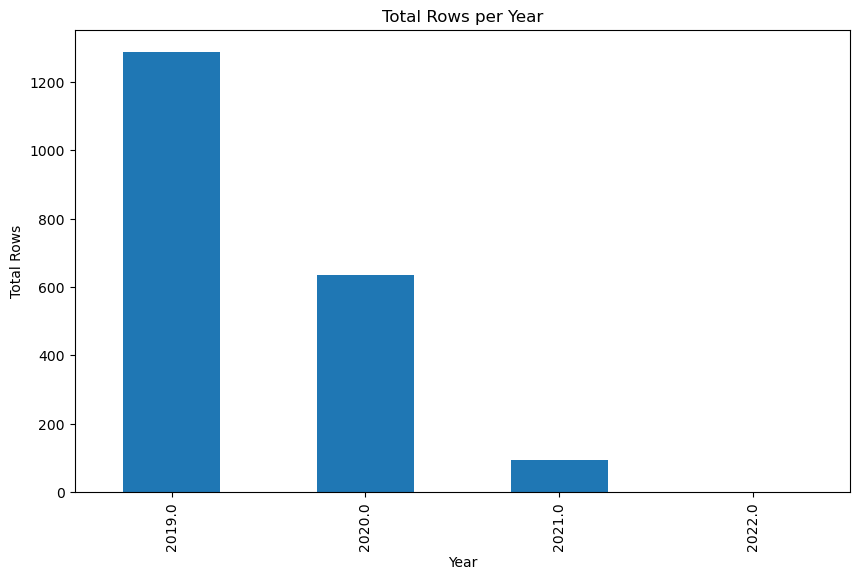

In [124]:
# Given the very distributed nature of the years and the irrealvance of years ago in calculating today's buyer's, 
# I'm going to filter to just the last 5 years

from datetime import datetime

current_year = datetime.now().year
start_year = current_year - 5

# Filter the dataframe
df = df[df['year'] >= start_year]

# Re-plot
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Rows')
plt.title('Total Rows per Year')
plt.show()

In [61]:
# Convert categorical variables
categorical_features = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'] 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [63]:
# Perform a train and test split

# After inspecting values VIN number can't help the business case, dropping that column as well as price and id
X = df.drop(['price', 'id', 'VIN'], axis=1) 
y = df['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [113]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from joblib import Parallel, delayed
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Use Linear, Ridge and Lasso Regressors
models = {
    "Linear": Pipeline(steps=[('regressor', LinearRegression())]),
    "Ridge": Pipeline(steps=[('regressor', Ridge())]),
    "Lasso": Pipeline(steps=[('regressor', Lasso())])
}

# Fit, Predict and calculate the MAE, MSE and R2 to evaluate the model performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} - Mean Squared Error: {mse:.0f} | Mean Absolute Error: {mae:.0f} | R2 Score: {r2:.1f}')

Linear - Mean Squared Error: 167038441 | Mean Absolute Error: 8599 | R2 Score: 0.6
Ridge - Mean Squared Error: 103078128 | Mean Absolute Error: 7154 | R2 Score: 0.8
Lasso - Mean Squared Error: 114026510 | Mean Absolute Error: 7300 | R2 Score: 0.7


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Answer
Looking at the findings, Ridge has the lowest MSE, lowest MAE and highest R2 Score so that will be the model I'll use going forward

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.